# Description on the dataset : Haberman breast Cancer Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

About this file:

Title: Haberman's Survival Data
Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Past Usage:
Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.

Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.

Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.

Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year.

Missing Attribute Values: None

Source # https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [428]:
habernman_df = pd.read_csv("haberman.csv")

In [429]:
habernman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [430]:
habernman_df.shape

(305, 4)

In [431]:
#Renaming the columns of the dataset
habernman_df_data = habernman_df.rename(columns = {"30": "Age_of_patients", 
                                  "64":"Operation_year", 
                                  "1": "Positive_axil_nodes","1.1":"Survival_Status"})

In [432]:
#Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year.

habernman_df_data['Survival_Status'] = habernman_df_data['Survival_Status'].map({1:"Survive", 2:"Dead"})
        
habernman_df_data.head()

,Age_of_patients,Operation_year,Positive_axil_nodes,Survival_Status
0,30,62,3,Survive
1,30,65,0,Survive
2,31,59,2,Survive
3,31,65,4,Survive
4,33,58,10,Survive


In [433]:
habernman_df_data.tail()

,Age_of_patients,Operation_year,Positive_axil_nodes,Survival_Status
300,75,62,1,Survive
301,76,67,0,Survive
302,77,65,3,Survive
303,78,65,1,Dead
304,83,58,2,Dead


In [434]:
habernman_df_data.describe()

,Age_of_patients,Operation_year,Positive_axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [435]:
habernman_df_data["Survival_Status"].value_counts()

Survive    224
Dead        81
Name: Survival_Status, dtype: int64

In [436]:
op_df = habernman_df_data["Operation_year"].value_counts().sort_index()
print(op_df)

58    36
59    27
60    28
61    26
62    23
63    30
64    30
65    28
66    28
67    25
68    13
69    11
Name: Operation_year, dtype: int64


In [437]:
habernman_df_data.groupby(['Age_of_patients','Survival_Status']).count()

Operation_year  Positive_axil_nodes
Age_of_patients Survival_Status                                     
30              Survive                       2                    2
31              Survive                       2                    2
33              Survive                       2                    2
34              Dead                          2                    2
                Survive                       5                    5
35              Survive                       2                    2
36              Survive                       2                    2
37              Survive                       6                    6
38              Dead                          1                    1
                Survive                       9                    9
39              Dead                          1                    1
                Survive                       5                    5
40              Survive                       3                    3
41              Dead                          3                    3
                Survive                       7                    7
42              Dead                          2                    2
                Survive                       7                    7
43              Dead                          4                    4
                Survive                       7                    7
44              Dead                          3                    3
                Survive                       4                    4
45              Dead                          3                    3
                Survive                       6                    6
46              Dead                          4                    4
                Survive                       3                    3
47              Dead                          3                    3
                Survive                       8                    8
48              Dead                          3                    3
                Survive                       4                    4
49              Dead                          2                    2
...                                         ...                  ...
60              Survive                       4                    4
61              Dead                          3                    3
                Survive                       6                    6
62              Dead                          3                    3
                Survive                       4                    4
63              Dead                          1                    1
                Survive                       7                    7
64              Survive                       5                    5
65              Dead                          4                    4
                Survive                       6                    6
66              Dead                          2                    2
                Survive                       3                    3
67              Dead                          2                    2
                Survive                       4                    4
68              Survive                       2                    2
69              Dead                          1                    1
                Survive                       3                    3
70              Dead                          2                    2
                Survive                       5                    5
71              Survive                       1                    1
72              Dead                          1                    1
                Survive                       3                    3
73              Survive                       2                    2
74              Dead                          1                    1
                Survive                       1                    1
75              Survive        

In [438]:
habernman_df_data.groupby(['Positive_axil_nodes','Survival_Status']).count()

Age_of_patients  Operation_year
Positive_axil_nodes Survival_Status                                 
0                   Dead                          19              19
                    Survive                      117             117
1                   Dead                           8               8
                    Survive                       32              32
2                   Dead                           5               5
                    Survive                       15              15
3                   Dead                           7               7
                    Survive                       13              13
4                   Dead                           3               3
                    Survive                       10              10
5                   Dead                           4               4
                    Survive                        2               2
6                   Dead                           3               3
                    Survive                        4               4
7                   Dead                           2               2
                    Survive                        5               5
8                   Dead                           2               2
                    Survive                        5               5
9                   Dead                           4               4
                    Survive                        2               2
10                  Dead                           1               1
                    Survive                        2               2
11                  Dead                           3               3
                    Survive                        1               1
12                  Dead                           1               1
                    Survive                        1               1
13                  Dead                           4               4
                    Survive                        1               1
14                  Dead                           1               1
                    Survive                        3               3
15                  Dead                           2               2
                    Survive                        1               1
16                  Survive                        1               1
17                  Dead                           1               1
18                  Survive                        1               1
19                  Dead                           2               2
                    Survive                        1               1
20                  Dead                           1               1
                    Survive                        1               1
21                  Dead                           1               1
22                  Dead                           1               1
                    Survive                        2               2
23                  Dead                           3               3
24                  Dead                           1               1
25                  Survive                        1               1
28                  Survive                        1               1
30                  Survive                        1               1
35                  Dead                           1               1
46                  Survive                        1               1
52                  Dead                           1               1

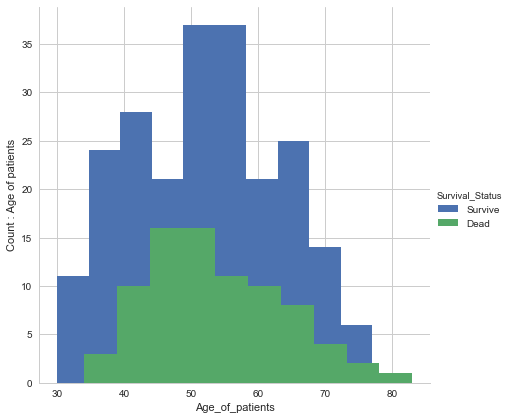

In [439]:
sns.set_style("whitegrid");
sns.FacetGrid(habernman_df_data, hue="Survival_Status", size=6) \
   .map(plt.hist,"Age_of_patients",) \
   .add_legend()
plt.ylabel('Count : Age of patients')
plt.show();

Observation : 

- The data is not a normal distribution as it looks visually from the above histogram.

- In the above horizontal bar X-axis denotes the count of patients and Y-axis denotes the age of the patients.

- Here we observe that maximum number of patients belong to the age group of 40-66.

- Maximum number of patients were in the age group of (44-53) Approx who died within 5 years.

- No death or very minimal death is seen in the above histogram between age group of (30-33) Approx.

- The survival rate is zero for the patients whose age is more than 77 Approx.

- Below age group of 40 , only 4 died within 5 years.

- Form above data it shows people with zero nodes have maximum chnages of surviving more than 5 years.

In [440]:
habernman_df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age_of_patients        305 non-null int64
Operation_year         305 non-null int64
Positive_axil_nodes    305 non-null int64
Survival_Status        305 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


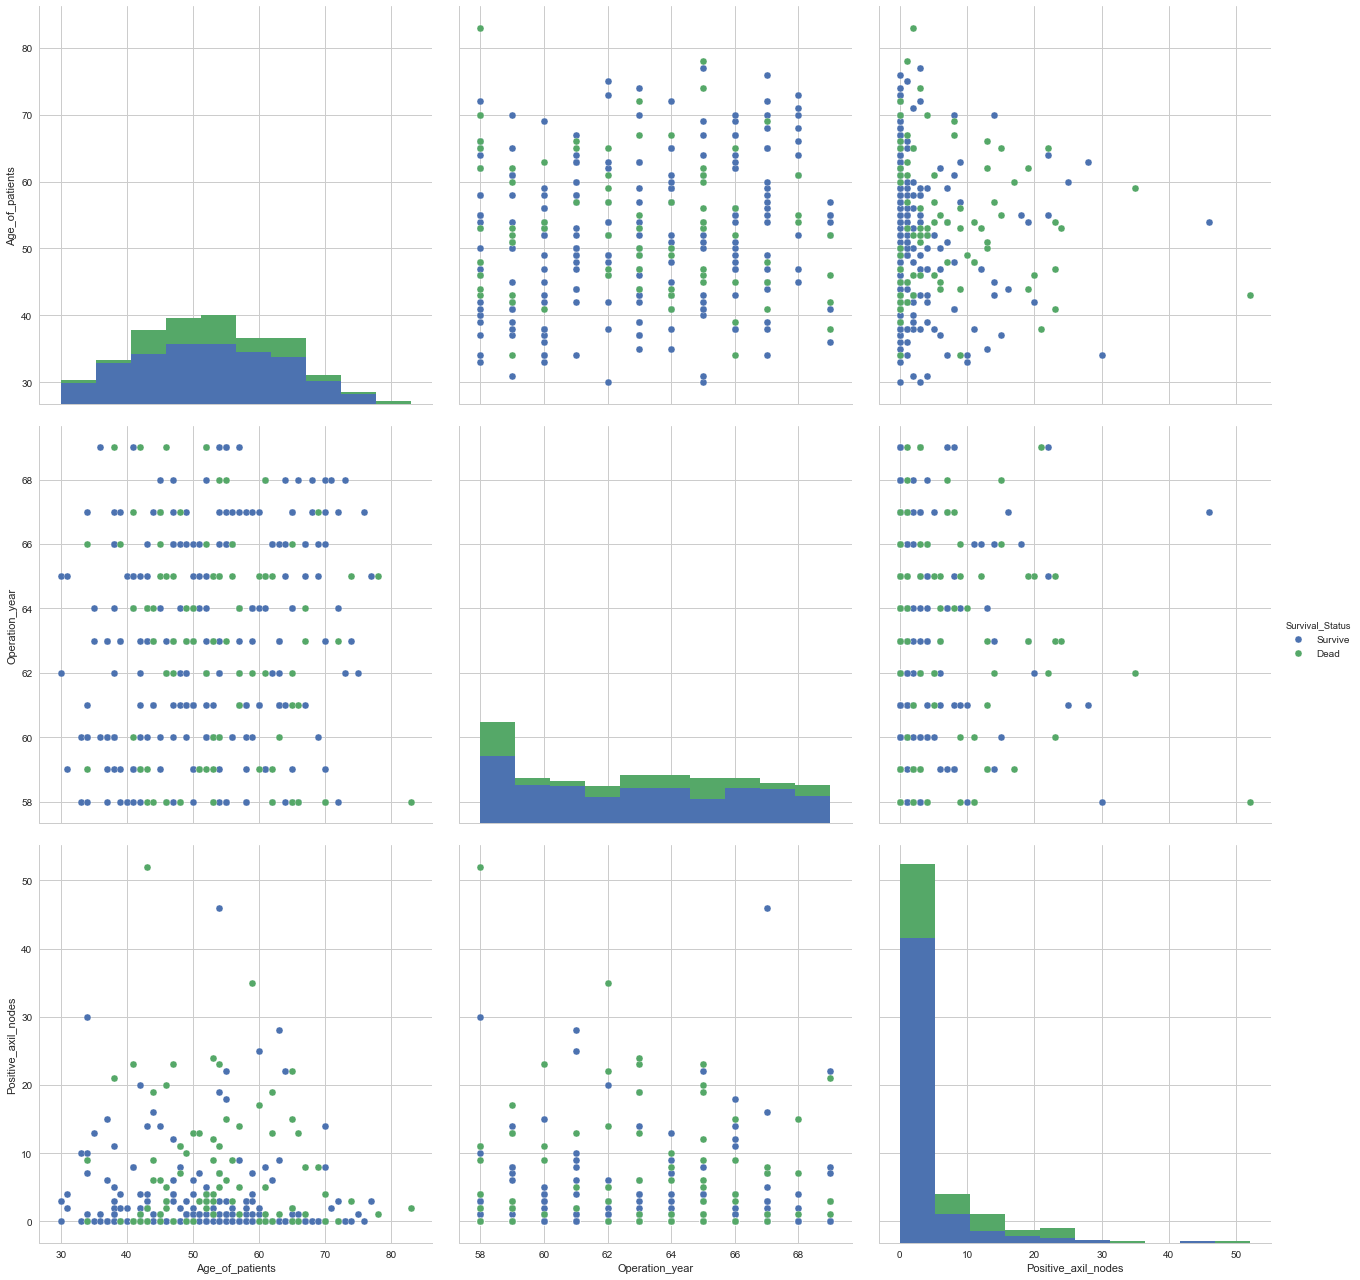

In [441]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(habernman_df_data, hue="Survival_Status", size=6);
plt.show()

Observation:

- In the plot-3 (x: Positive_axil_nodes , y:Age_of_patients) , here 10 axillary nodes in found in maximum patients.

- Patient with nodes less than 3 has changes of survial more than 5 years compared to the patient who has more more than 3.

- Patient with more than 10 nodes has less changes of survival more than 5 year.

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


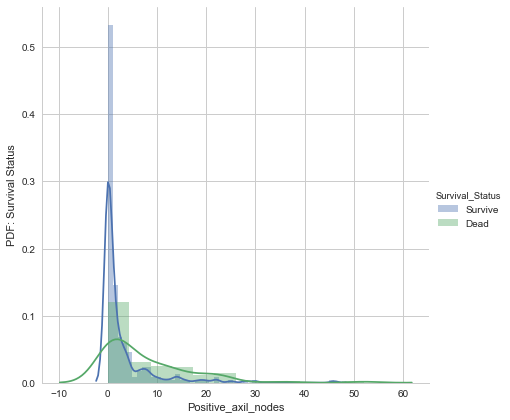

In [450]:
sns.FacetGrid(habernman_df_data, hue="Survival_Status", size=6) \
   .map(sns.distplot, "Positive_axil_nodes") \
   .add_legend();
plt.ylabel('PDF: Survival Status')
plt.show();

Observation:

- This is not a normal distribution curve and the data points are not balanced.
- Both the curve have a positive skewness and mode,median and mean are not equal.
- The survive curve has a positive kurtosis(>3) where are the dead curve has a negative kurtosis(<3) approx.
- The maximum area for the survie curve is between (0,3) positive axil nodes.That means the patient with nodes less than 3 has higer probability of surviving more than 5 years.


//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


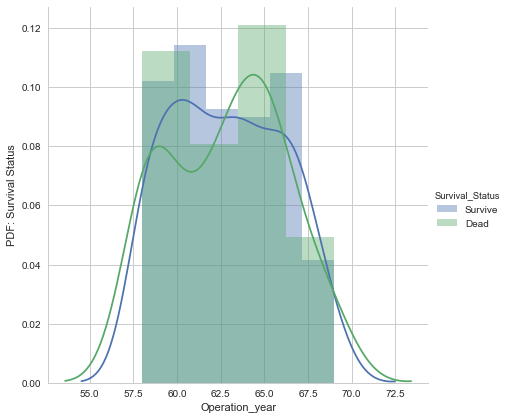

In [443]:
sns.FacetGrid(habernman_df_data, hue="Survival_Status", size=6) \
   .map(sns.distplot, "Operation_year") \
   .add_legend();
plt.ylabel('PDF: Survival Status')
plt.show();

Observation:

- In the operation year between (64,65) the dead within 5 years  is more and even the count is more than the surving rate.
- The curves are almost similar and therefore its very difficult to drawn any inference from this plot.

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


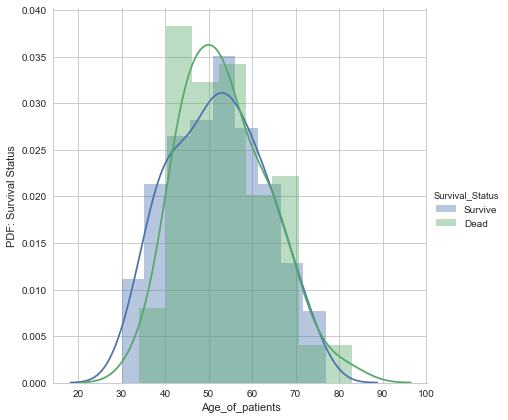

In [444]:
sns.FacetGrid(habernman_df_data, hue="Survival_Status", size=6) \
   .map(sns.distplot, "Age_of_patients") \
   .add_legend();
plt.ylabel('PDF: Survival Status')
plt.show();

Observation :

- The curves are almost similar and therefore its very difficult to drawn any inference from this plot.

[ 0.1875      0.10714286  0.10267857  0.07142857  0.09821429  0.09821429
  0.06696429  0.09821429  0.09375     0.07589286]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
[ 0.25925926  0.04938272  0.03703704  0.08641975  0.09876543  0.09876543
  0.16049383  0.07407407  0.04938272  0.08641975]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
[ 0.83482143  0.08035714  0.02232143  0.02678571  0.01785714  0.00446429
  0.00892857  0.          0.          0.00446429]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]
[ 0.04910714  0.10714286  0.125       0.09375     0.16517857  0.16517857
  0.09375     0.11160714  0.0625      0.02678571]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]
[ 0.03703704  0.12345679  0.19753086  0.19753086  0.1

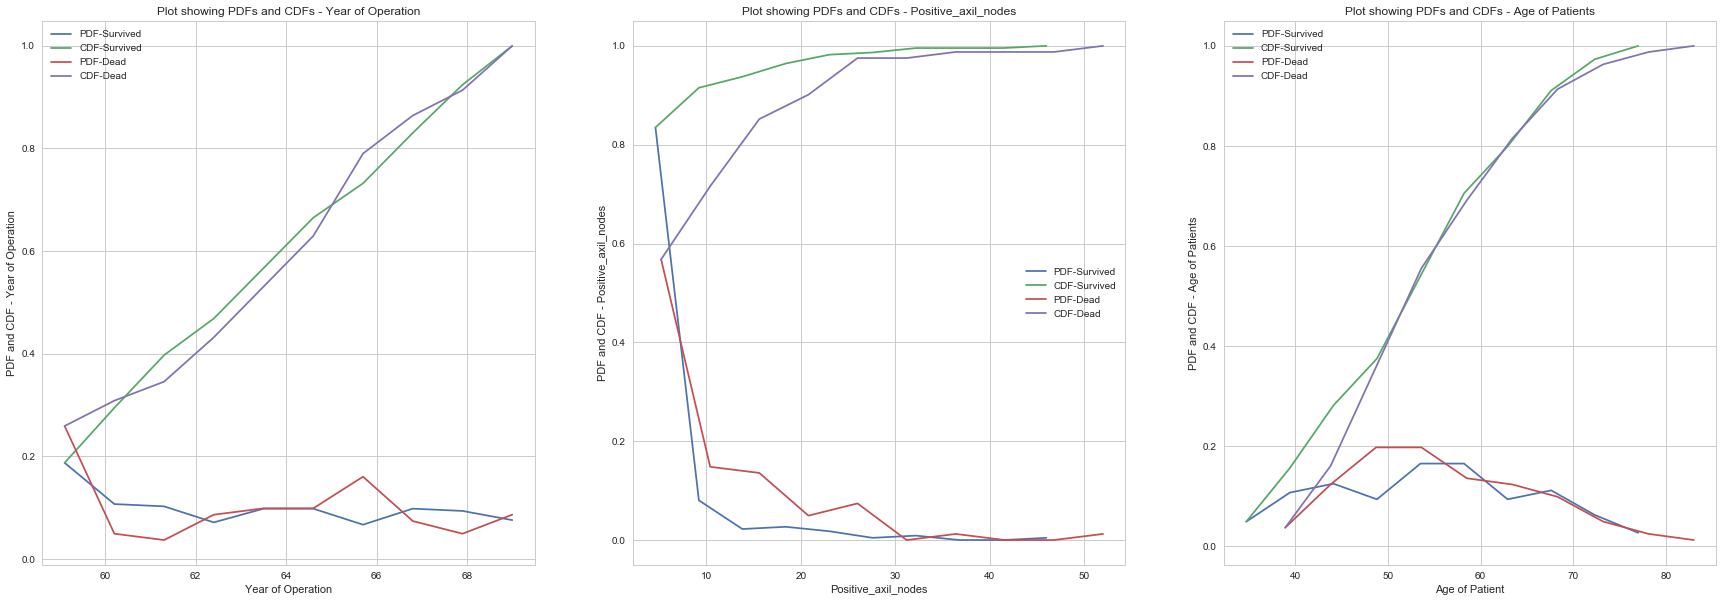

In [503]:
#Here in this section(Operation_year,Age_of_patients,Positive_axil_nodes) each feature is divided into survive and dead class 

#PDF and CDF for the patients who survived for the Operation_year plot.

figure, axis = plt.subplots(1, 3, figsize = (30, 10))

counts, bin_edges = np.histogram(habernman_df_data.loc[habernman_df_data['Survival_Status'] == \
                                                       'Survive',"Operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
axis[0].plot(bin_edges[1:],pdf);
axis[0].plot(bin_edges[1:], cdf);

#PDF and CDF for the patients who didnot survive for the Operation_year plot.

counts_dead, bin_edges_dead = np.histogram(habernman_df_data.loc[habernman_df_data['Survival_Status'] == \
                                                       'Dead',"Operation_year"], bins=10, density = True)
pdf_dead = counts_dead/(sum(counts_dead))
print(pdf_dead);
print(bin_edges_dead);
cdf_dead = np.cumsum(pdf_dead)
axis[0].plot(bin_edges_dead[1:],pdf_dead);
axis[0].plot(bin_edges_dead[1:], cdf_dead);

axis[0].legend(['PDF-Survived', 'CDF-Survived','PDF-Dead', 'CDF-Dead'])
axis[0].set(ylabel = 'PDF and CDF - Year of Operation' , xlabel= 'Year of Operation')
axis[0].set_title("Plot showing PDFs and CDFs - Year of Operation")

#PDF and CDF for the patients who survived for the Positive_axil_nodes plot.
counts, bin_edges = np.histogram(habernman_df_data.loc[habernman_df_data['Survival_Status'] == \
                                                       'Survive',"Positive_axil_nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
axis[1].plot(bin_edges[1:],pdf);
axis[1].plot(bin_edges[1:], cdf)

#PDF and CDF for the patients who didnot survive for the Positive_axil_nodes plot.

counts_dead, bin_edges_dead = np.histogram(habernman_df_data.loc[habernman_df_data['Survival_Status'] == \
                                                       'Dead',"Positive_axil_nodes"], bins=10, density = True)
pdf_dead = counts_dead/(sum(counts_dead))
print(pdf_dead);
print(bin_edges_dead);
cdf_dead = np.cumsum(pdf_dead)
axis[1].plot(bin_edges_dead[1:],pdf_dead);
axis[1].plot(bin_edges_dead[1:], cdf_dead);

axis[1].legend(['PDF-Survived', 'CDF-Survived','PDF-Dead', 'CDF-Dead'])
axis[1].set(ylabel='PDF and CDF - Positive_axil_nodes' , xlabel ='Positive_axil_nodes')
axis[1].set_title("Plot showing PDFs and CDFs - Positive_axil_nodes")

#PDF and CDF for the patients who survived for the Age_of_patients plot.

counts, bin_edges = np.histogram(habernman_df_data.loc[habernman_df_data['Survival_Status'] == \
                                                       'Survive',"Age_of_patients"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
axis[2].plot(bin_edges[1:],pdf);
axis[2].plot(bin_edges[1:], cdf)

#PDF and CDF for the patients who didnot survive for the Age_of_patients plot.

counts_dead, bin_edges_dead = np.histogram(habernman_df_data.loc[habernman_df_data['Survival_Status'] == \
                                                       'Dead',"Age_of_patients"], bins=10, density = True)
pdf_dead = counts_dead/(sum(counts_dead))
print(pdf_dead);
print(bin_edges_dead);
cdf_dead = np.cumsum(pdf_dead)
axis[2].plot(bin_edges_dead[1:],pdf_dead);
axis[2].plot(bin_edges_dead[1:], cdf_dead)

plt.legend(['PDF-Survived', 'CDF-Survived','PDF-Dead', 'CDF-Dead'])
plt.ylabel('PDF and CDF - Age of Patients')
plt.xlabel('Age of Patient')
plt.title("Plot showing PDFs and CDFs - Age of Patients")
plt.show();

Observation:
    - In the first and last plot the curves for the survive and dead class are mostly overlapping so no much inference can be drawn from them.
    - In the second plot almost 88%(Approx) patients have less than 10 psitive axil nodes have survived more than 5 years.
    -In the second plot,the CDF for the dead class where nodes > 30 is almost converging with the 100% mark, which means the patientes with more than 30 nodes are most likely to not survive more than  years.

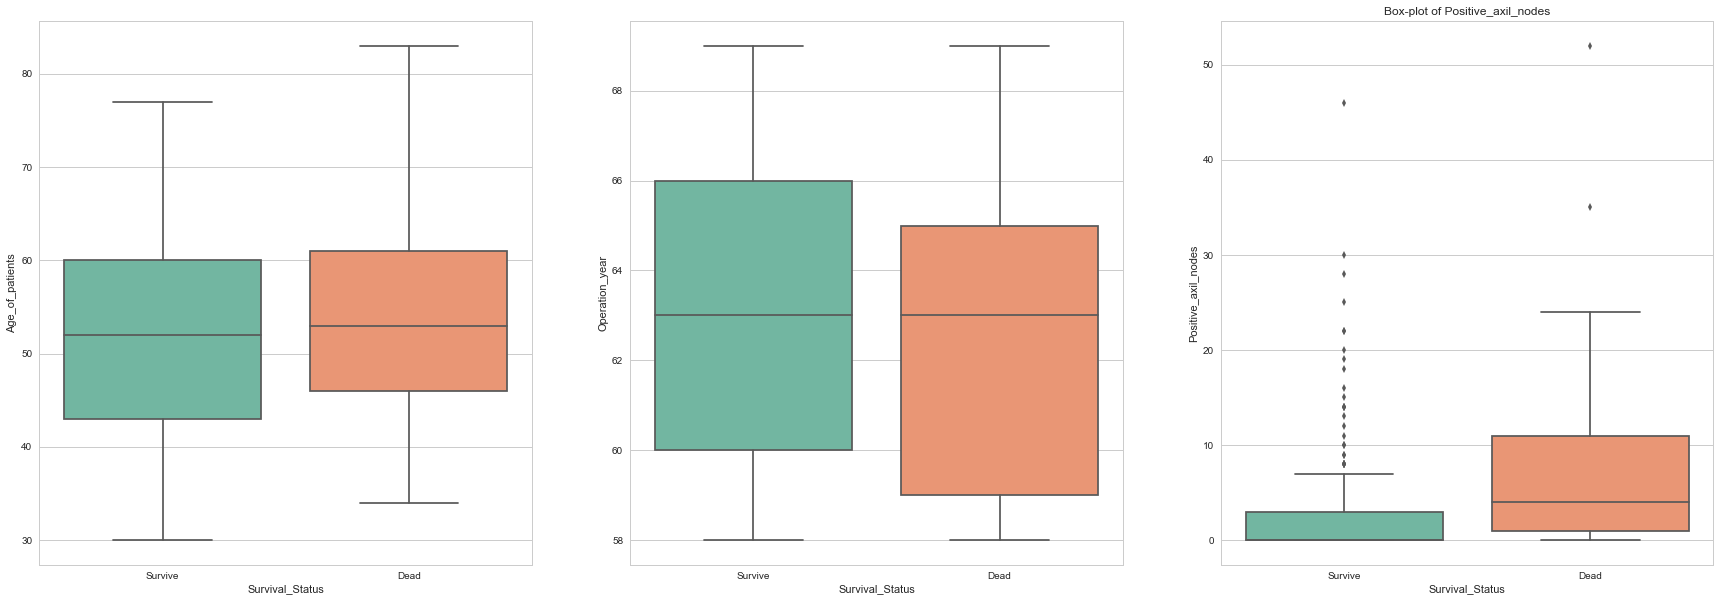

In [448]:
#Box-plot for all the feature of the dataset w.r.to the survival status of the patient.
figure, axis = plt.subplots(1, 3, figsize = (30, 10))

sns.boxplot(x = 'Survival_Status', y = 'Age_of_patients',palette = 'Set2', data = habernman_df_data,ax = axis[0])
plt.title("Box-plot of Age_of_patients")

sns.boxplot(x = 'Survival_Status', y = 'Operation_year',palette = 'Set2', data = habernman_df_data,ax = axis[1])
plt.title("Box-plot of Operation_year")

sns.boxplot(x = 'Survival_Status', y = 'Positive_axil_nodes',palette = 'Set2', data = habernman_df_data,ax = axis[2])
plt.title("Box-plot of Positive_axil_nodes")

plt.show()

- In the box plot the IQR does not have much difference so its difficult to draw any conclusion.
- In the last plot , a patient with less nodes more chances to survive but with more nodes his chances to survive more than 5 years decreases.


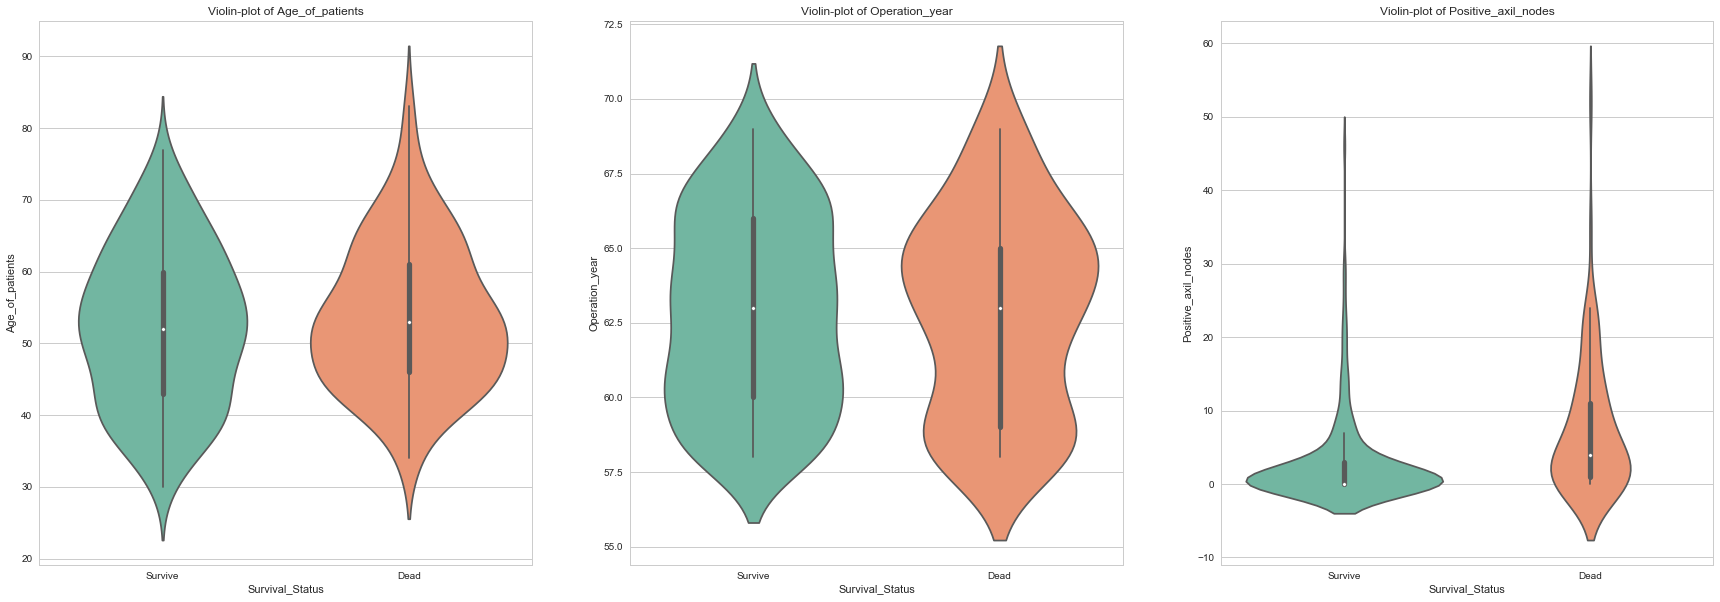

In [505]:
#Violin-plot for all the feature of the dataset w.r.to the survival status of the patient.
figure, axis = plt.subplots(1, 3, figsize = (30, 10))

sns.violinplot(x = 'Survival_Status', y = 'Age_of_patients',palette = 'Set2' ,data = habernman_df_data,ax = axis[0])
axis[0].set_title("Violin-plot of Age_of_patients")

sns.violinplot(x = 'Survival_Status', y = 'Operation_year',palette = 'Set2', data = habernman_df_data,ax = axis[1])
axis[1].set_title("Violin-plot of Operation_year")

sns.violinplot(x = 'Survival_Status', y = 'Positive_axil_nodes',palette = 'Set2', data = habernman_df_data,ax = axis[2])
plt.title("Violin-plot of Positive_axil_nodes")

plt.show()

- In the violin plot not much conclusion can be drawn.
- Since these plots have box plot and PDF in them , we have already dicuss them in the earlier analysis.